In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read the data
df = pd.read_csv('E-commerce Website Logs new.csv')

C:\Users\gabriel garcia\AppData\Local\Temp\ipykernel_23036\1160459234.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('E-commerce Website Logs new.csv')


In [3]:
# check the shape of the data
display(df.head())
display(df.shape)
display(df.info())
display(df.columns)

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.96,No,0,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.94,No,0,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.62,No,0,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,9.575.775,No,0,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.368,No,0,Cash


(172838, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   accessed_date     172838 non-null  object
 1   duration_(secs)   172838 non-null  int64 
 2   network_protocol  172838 non-null  object
 3   ip                172838 non-null  object
 4   bytes             172838 non-null  int64 
 5   accessed_Ffom     172838 non-null  object
 6   age               172838 non-null  object
 7   gender            172838 non-null  object
 8   country           172838 non-null  object
 9   membership        172838 non-null  object
 10  language          172838 non-null  object
 11  sales             172838 non-null  object
 12  returned          172838 non-null  object
 13  returned_amount   172838 non-null  object
 14  pay_method        172838 non-null  object
dtypes: int64(2), object(13)
memory usage: 19.8+ MB


None

Index(['accessed_date', 'duration_(secs)', 'network_protocol', 'ip', 'bytes',
       'accessed_Ffom', 'age', 'gender', 'country', 'membership', 'language',
       'sales', 'returned', 'returned_amount', 'pay_method'],
      dtype='object')

In [4]:
# check the quantity of unique values in each column
unique_values = []
for i in df.columns[0:16].tolist():
	print(i,':' ,len(df[i].astype(str).value_counts()))
	unique_values.append(len(df[i].astype(str).value_counts()))

accessed_date : 81747
duration_(secs) : 3501
network_protocol : 4
ip : 137199
bytes : 4695
accessed_Ffom : 8
age : 54
gender : 3
country : 27
membership : 3
language : 30
sales : 5600
returned : 2
returned_amount : 2135
pay_method : 4


In [5]:
df['age'].unique()

array(['28', '21', '20', '66', '53', '49', '32', '69', '60', '36', '29',
       '67', '25', '24', '65', '42', '46', '23', '27', '52', '44', '51',
       '50', '68', '43', '59', '54', '48', '40', '41', '19', '18', '22',
       '61', '45', '64', '33', '63', '34', '47', '38', '57', '30', '26',
       '62', '39', '55', '56', '35', '31', '37', '--', '58', '0', 0],
      dtype=object)

In [6]:
# adjust the data types of the columns
df['age'] = df['age'].replace('--', '0')
df['sales'] = df['sales'].str.replace('.', '', regex=False)
df['returned_amount'] = df['returned_amount'].str.replace('.', '', regex=False)
df['returned'] = df['returned'].replace({'Yes': True, 'No': False}) 

df['duration(mins)'] = round(df['duration_(secs)'] / 60 , 0)
df['accessed_date'] = pd.to_datetime(df['accessed_date'])
df['age'] = df['age'].astype(int)
df['age'] = df['age'].replace(0, np.nan)
df['sales'] = df['sales'].astype(float)  
df['returned'] = df['returned'].replace(0, np.nan)
df['returned'] = df['returned'].astype(bool)  
df['returned_amount'] = df['returned_amount'].astype(float)
df['returned_amount'] = df['returned_amount'].replace(0, np.nan)

colunms_to_drop = ['network_protocol','ip', 'bytes']
df.drop(colunms_to_drop, axis=1, inplace=True)

C:\Users\gabriel garcia\AppData\Local\Temp\ipykernel_23036\2828426054.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['returned'] = df['returned'].replace({'Yes': True, 'No': False})


In [7]:
# check if the data types were adjusted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   accessed_date    172838 non-null  datetime64[ns]
 1   duration_(secs)  172838 non-null  int64         
 2   accessed_Ffom    172838 non-null  object        
 3   age              84714 non-null   float64       
 4   gender           172838 non-null  object        
 5   country          172838 non-null  object        
 6   membership       172838 non-null  object        
 7   language         172838 non-null  object        
 8   sales            172838 non-null  float64       
 9   returned         172838 non-null  bool          
 10  returned_amount  22564 non-null   float64       
 11  pay_method       172838 non-null  object        
 12  duration(mins)   172838 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1), object(6)
memory usag

In [8]:
# check descriptive statistics
df.describe()

,accessed_date,duration_(secs),age,sales,returned_amount,duration(mins)
count,172838,172838.000000,84714.000000,1.728380e+05,2.256400e+04,172838.000000
mean,2017-03-18 16:27:04.182139136,3248.031827,43.438263,3.547239e+04,2.691366e+05,54.133454
min,2017-03-14 17:43:26.135000,1500.000000,18.000000,0.000000e+00,3.000000e+00,25.000000
25%,2017-03-16 21:31:35.724000,2371.000000,30.000000,3.030000e+02,7.913500e+03,40.000000
50%,2017-03-18 18:05:46.921999872,3246.000000,43.000000,3.584000e+03,2.846200e+04,54.000000
75%,2017-03-20 13:19:40.308999936,4124.000000,56.000000,1.500400e+04,1.200320e+05,69.000000
max,2017-03-21 23:59:30.671000,5000.000000,69.000000,2.396266e+07,2.396266e+07,83.000000
std,NaN,1010.872270,14.980135,1.748283e+05,7.336272e+05,16.851000


In [9]:
# every row with gender equal to unknown have sales value equal to 0 so we can drop them
select = df.query('gender == "Unknown" and sales == 0').index
df.drop(select, inplace=True)

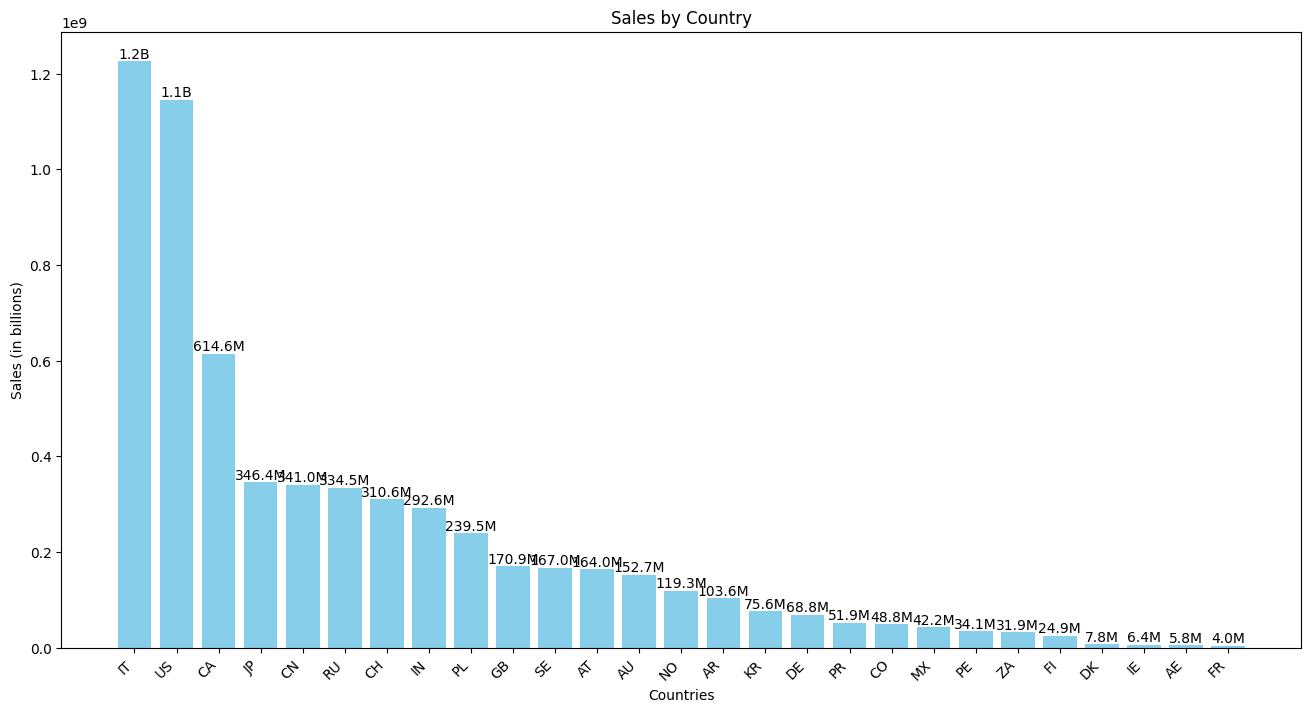

,sales_sum,sales_mean
country,,
IT,1.2B,39205.96
US,1.1B,41492.28
CA,614.6M,38111.66
JP,346.4M,38283.48
CN,341.0M,37007.82
RU,334.5M,38692.03
CH,310.6M,41428.40
IN,292.6M,40135.63
PL,239.5M,39455.54


In [25]:
# Plot the sales by country
def abbreviate_number(num):
    if num >= 1_000_000_000:  
        return f"{num / 1_000_000_000:.1f}B"
    if num >= 1_000_000:  
        return f"{num / 1_000_000:.1f}M"
    elif num >= 1_000:  
        return f"{num / 1_000:.1f}K"
    else:  
        return f"{num:.0f}"

df_grouped = df.groupby('country')['sales'].sum().sort_values(ascending=False)
df_grouped_abbreviated = df_grouped.apply(abbreviate_number)
plt.figure(figsize=(16, 8))
bars = plt.bar(df_grouped.index, df_grouped.values, color='skyblue')
for bar, value in zip(bars, df_grouped.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),  
        abbreviate_number(value),  
        ha='center', va='bottom', fontsize=10  
    )

plt.xlabel('Countries')
plt.ylabel('Sales (in billions)')
plt.title('Sales by Country')
plt.xticks(rotation=45, ha='right')
plt.show()

# Grouping the data by country and applying aggregations
df_agg = df.groupby('country').agg({
    'sales': ['sum', 'mean']
})

df_agg.columns = ['sales_sum', 'sales_mean']
df_agg = df_agg.sort_values(by='sales_sum', ascending=False)
df_agg['sales_sum'] = df_agg['sales_sum'].apply(abbreviate_number)
df_agg['sales_mean'] = df_agg['sales_mean'].round(2)

display(df_agg)


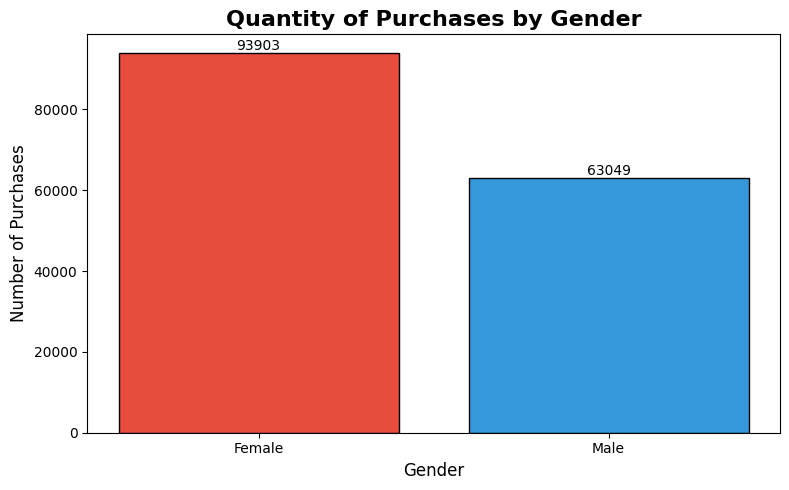

In [19]:
# quantity of purchases by gender
gender_counts = df['gender'].value_counts()

fig, ax = plt.subplots(figsize=(8, 5))  
bars = ax.bar(
    gender_counts.index, 
    gender_counts.values, 
    color=['#e74c3c', '#3498db'],  
    edgecolor='black'
)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

ax.set_title('Quantity of Purchases by Gender', fontsize=16, fontweight='bold')
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Number of Purchases', fontsize=12)
ax.set_axisbelow(True)  

plt.tight_layout()
plt.show()

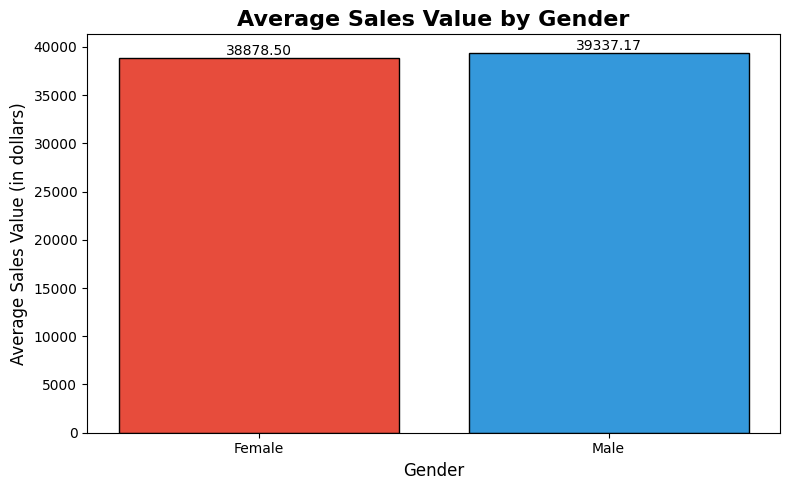

In [20]:
# average sales value by gender
avg_sales_by_gender = df.groupby('gender')['sales'].mean()

fig, ax = plt.subplots(figsize=(8, 5))  
bars = ax.bar(
    avg_sales_by_gender.index, 
    avg_sales_by_gender.values, 
    color=['#e74c3c', '#3498db'], 
    edgecolor='black'
)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:.2f}',  
        ha='center', 
        va='bottom', 
        fontsize=10
    )

ax.set_title('Average Sales Value by Gender', fontsize=16, fontweight='bold')
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Average Sales Value (in dollars)', fontsize=12)
ax.set_axisbelow(True) 

plt.tight_layout()
plt.show()

,Average Value,Count,Total
age_range,,,
18 - 25,44706.48,11438,511.4M
25 - 40,47320.90,24553,1.2B
40 - 55,46780.54,24506,1.1B
55 +,34330.52,96455,3.3B


posx and posy should be finite values
posx and posy should be finite values


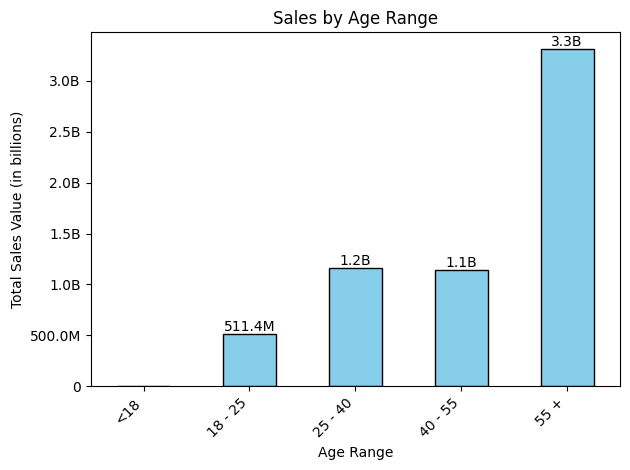

In [21]:
def generateAgeRange(age):
    if age < 18:
        return '<18'
    elif age < 25:
        return '18 - 25'
    elif age < 40:
        return '25 - 40'
    elif age < 55:
        return '40 - 55'
    else:
        return '55 +'

def format_axis_y(value, _):
    if value >= 1_000_000_000:  
        return f"{value / 1_000_000_000:.1f}B"
    elif value >= 1_000_000:  
        return f"{value / 1_000_000:.1f}M"
    else:  
        return str(int(value))

df['age_range'] = df['age'].apply(generateAgeRange)
df_age_range = df.groupby('age_range')['sales'].agg(['mean', 'count', 'sum'])
df_age_range.columns = ['Average Value', 'Count', 'Total']
df_age_range['Total'] = df_age_range.Total.apply(abbreviate_number)
df_age_range['Average Value'] = df_age_range['Average Value'].round(2)

display(df_age_range)

age_range_order = ['<18', '18 - 25', '25 - 40', '40 - 55', '55 +']
totals = df.groupby('age_range')['sales'].sum().reindex(age_range_order)
ax = totals.plot(
    kind='bar', edgecolor='black', color='skyblue'
)

plt.title('Sales by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Total Sales Value (in billions)')
plt.xticks(rotation=45, ha='right')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(format_axis_y))
for i, total in enumerate(totals):
    ax.text(i, total, abbreviate_number(total), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


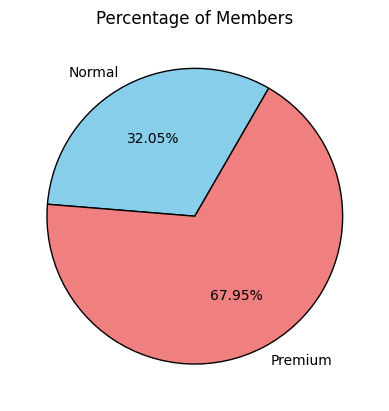

In [22]:
# Plot the sales by membership
returned_counts = df.groupby('membership')['sales'].sum()

returned_counts.plot(
    kind='pie', 
    autopct='%1.2f%%',  
    startangle=60,      
    colors=['skyblue', 'lightcoral'],  
    labels=['Normal', 'Premium'],  
    wedgeprops={'edgecolor': 'black'}  
)

plt.title('Percentage of Members')
plt.ylabel('')

plt.show()

C:\Users\gabriel garcia\AppData\Local\Temp\ipykernel_23036\2459548470.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, grouped.sum(axis=1)[i], f'{percentage}%',
C:\Users\gabriel garcia\AppData\Local\Temp\ipykernel_23036\2459548470.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, grouped.sum(axis=1)[i], f'{percentage}%',
C:\Users\gabriel garcia\AppData\Local\Temp\ipykernel_23036\2459548470.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a 

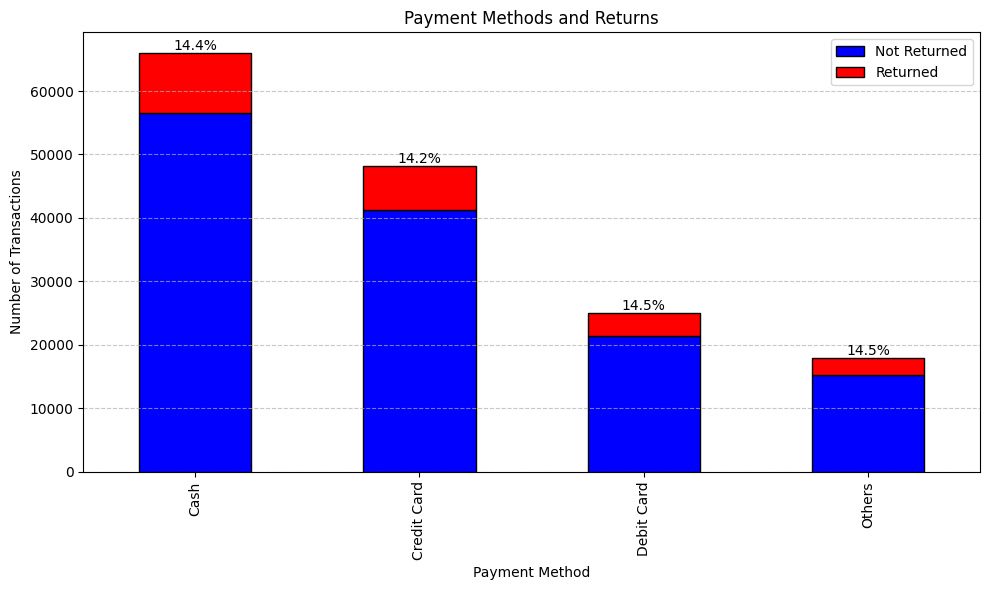

In [23]:
# Create a DataFrame grouped by payment method and returns
grouped = df.groupby(['pay_method', 'returned']).size().unstack()

percentages = (grouped[True] / (grouped[True] + grouped[False]) * 100).round(1)

ax = grouped.plot(kind='bar', 
                 stacked=True, 
                 color=['blue', 'red'],
                 edgecolor='black',
                 figsize=(10, 6))

for i, percentage in enumerate(percentages):
    plt.text(i, grouped.sum(axis=1)[i], f'{percentage}%', 
             ha='center', va='bottom')

plt.title('Payment Methods and Returns')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Not Returned', 'Returned'])

plt.tight_layout()


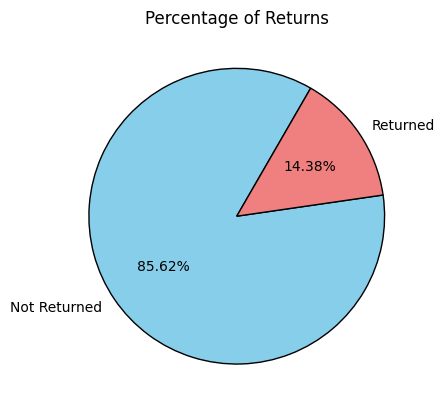

In [24]:
# Get the return counts
returned_counts = df['returned'].value_counts()

returned_counts.plot(
    kind='pie', 
    autopct='%1.2f%%',  
    startangle=60,     
    colors=['skyblue', 'lightcoral'],  
    labels=['Not Returned', 'Returned'],
    wedgeprops={'edgecolor': 'black'} 
)

plt.title('Percentage of Returns')
plt.ylabel('')

plt.show()
